In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print("Shape of DF is ", df.shape)

Shape of DF is  (569, 30)


In [5]:
# Check for missing data
print("Number of Missing Values is ", df.isna().sum().sum())

Number of Missing Values is  0


In [6]:
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [7]:
# Select columns with 'mean','worst','error'
df_mean = df.iloc[:,0:10]
df_error = df.iloc[:,11:20]
df_worst = df.iloc[:,21:31]

<AxesSubplot:>

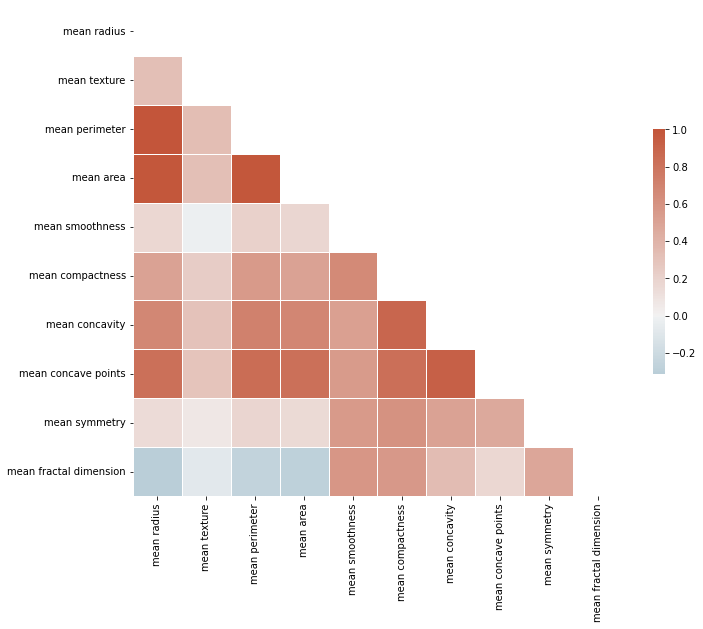

In [8]:
# Correlation Matrix
corr = df_mean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

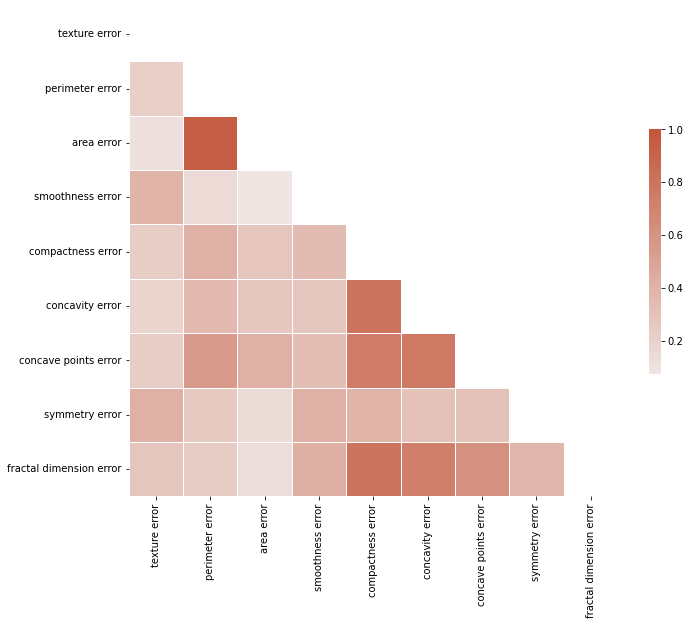

In [9]:
# Correlation Matrix
corr = df_error.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

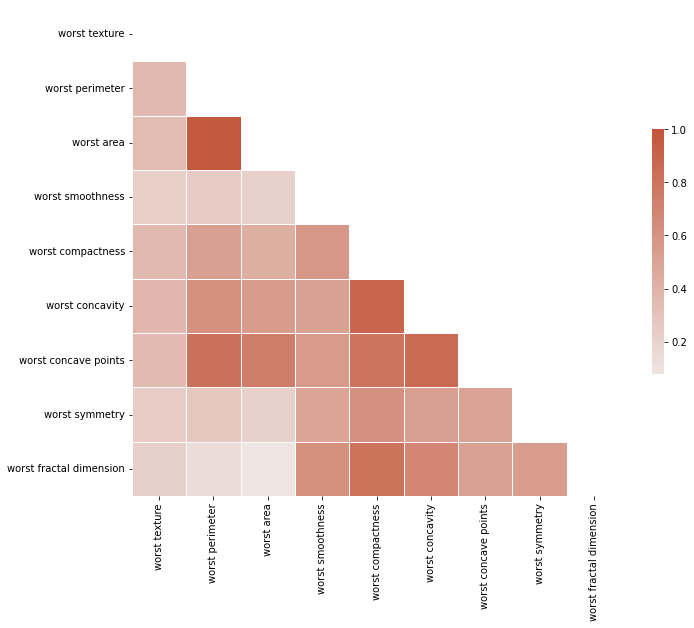

In [10]:
# Correlation Matrix
corr = df_worst.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

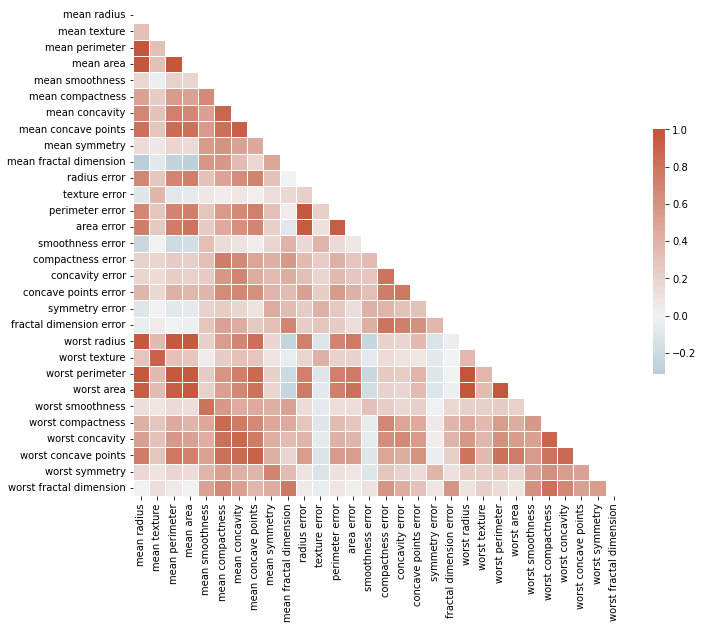

In [11]:
# Correlation Matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

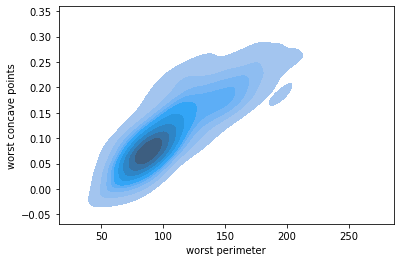

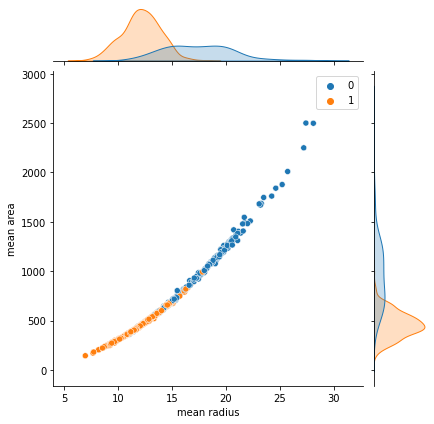

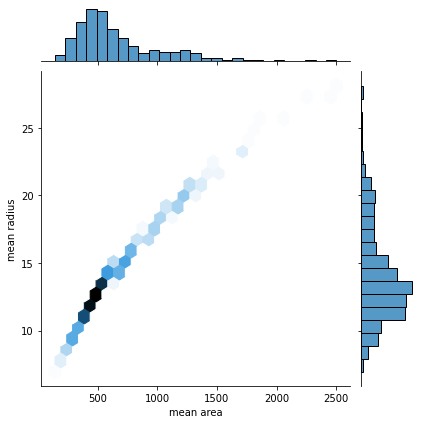

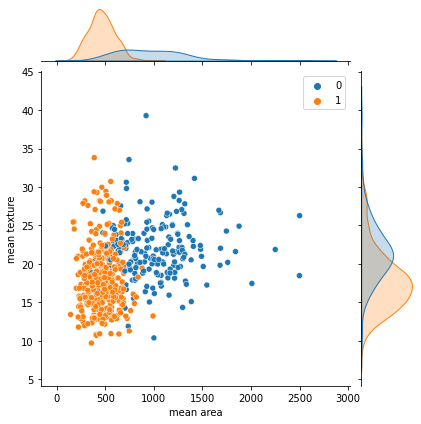

In [12]:
# Bivariate plots
sns.kdeplot(x = df['worst perimeter'], y = df['worst concave points'], fill=True)
sns.jointplot(x = df['mean radius'], y = df['mean area'], hue = cancer.target)
sns.jointplot(x = df['mean area'], y = df['mean radius'],kind = "hex")
sns.jointplot(x = df['mean area'], y = df['mean texture'], hue = cancer.target)

### Pipeline, GridSearchCV, SVM

#### Principal Components

In [13]:
X_trn, X_test, Y_trn, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.25,
                                               stratify=cancer.target, random_state=30)

print("train feature shape: ", X_trn.shape)
print("test feature shape ", X_test.shape)

train feature shape:  (426, 30)
test feature shape  (143, 30)


In [14]:
# Scale data first 
scaler1 = StandardScaler()
scaler1.fit(cancer.data)
fs = scaler1.transform(cancer.data)

In [15]:
# Scale data first 
scaler1 = StandardScaler()
scaler1.fit(cancer.data)
fs = scaler1.transform(cancer.data)

#PCA
pca = PCA(n_components = 4)
pca.fit(fs)
fs_pca = pca.transform(fs)
print("Scaled PCA feature shape is ", np.shape(fs_pca))

Scaled PCA feature shape is  (569, 4)


In [16]:
dfpca = pd.DataFrame(fs_pca, columns = ['PC1','PC2','PC3','PC4'])
dfpca.head()

,PC1,PC2,PC3,PC4
0,9.192837,1.948583,-1.123166,3.633731
1,2.387802,-3.768172,-0.529293,1.118264
2,5.733896,-1.075174,-0.551748,0.912083
3,7.122953,10.275589,-3.232790,0.152547
4,3.935302,-1.948072,1.389767,2.940639


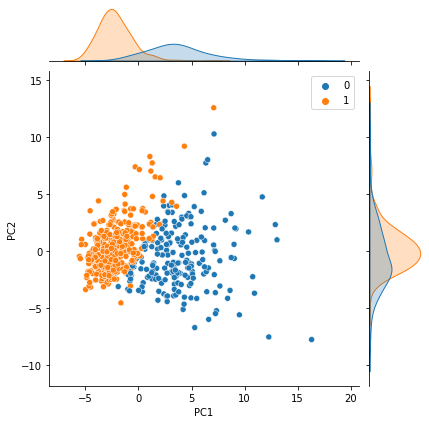

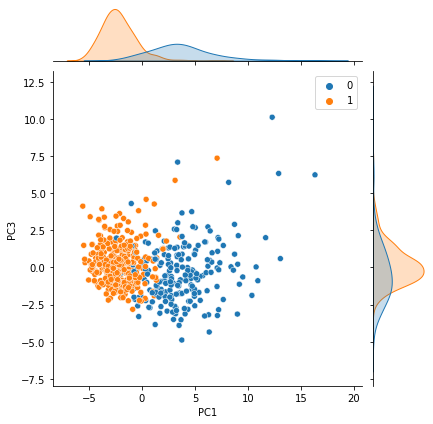

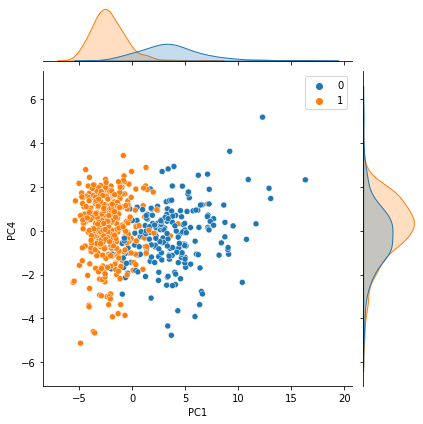

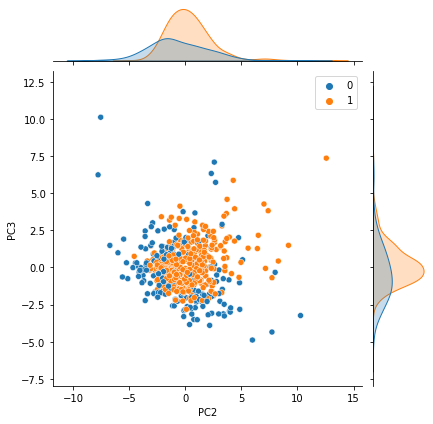

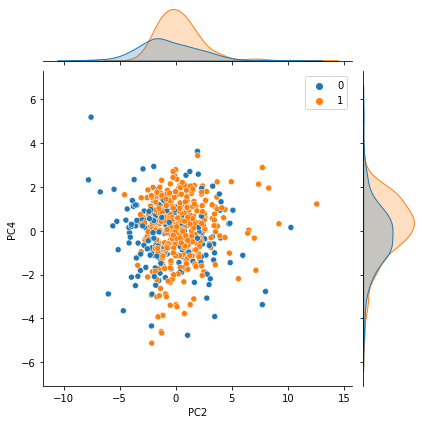

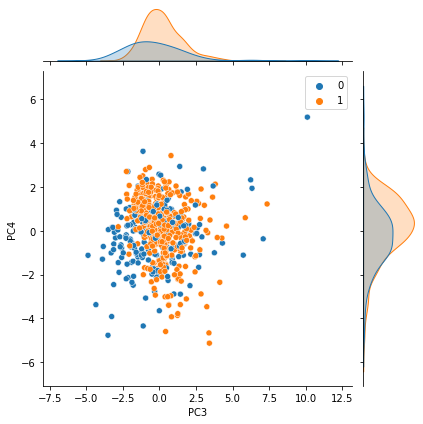

In [17]:
# Plot cancer data for 4 PCs
sns.jointplot(x = dfpca['PC1'], y = dfpca['PC2'], hue = cancer.target)
sns.jointplot(x = dfpca['PC1'], y = dfpca['PC3'], hue = cancer.target)
sns.jointplot(x = dfpca['PC1'], y = dfpca['PC4'], hue = cancer.target)
sns.jointplot(x = dfpca['PC2'], y = dfpca['PC3'], hue = cancer.target)
sns.jointplot(x = dfpca['PC2'], y = dfpca['PC4'], hue = cancer.target)
sns.jointplot(x = dfpca['PC3'], y = dfpca['PC4'], hue = cancer.target)

### Results
As we can see, there is not much class separation when contrasting PC2, PC3, and PC4 amongst each other. However, PC1 offers good separation.
 - What about variance ratios?

In [18]:
# Variance Contributions
fvar = np.var(fs_pca, axis = 0)
fvar_rat = fvar/np.sum(fvar)
print("Variance ratio of the 4 PCA groups is ", fvar_rat)

Variance ratio of the 4 PCA groups is  [0.55871858 0.23941873 0.11854291 0.08331978]


C:\Users\gmg30\AppData\Local\Temp/ipykernel_17192/989183651.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


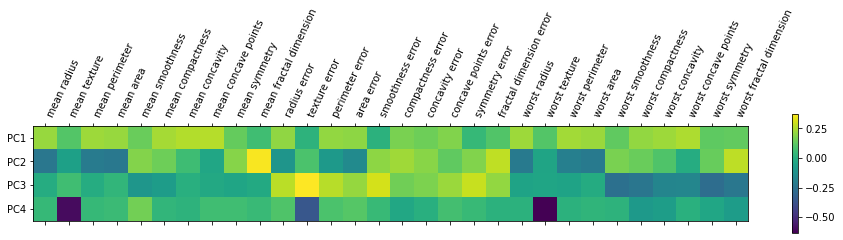

In [19]:
# Heatmap of what features compose our two best PCs

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['PC1','PC2','PC3','PC4'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

### Grid Search CV

In [27]:
pipe = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC())]

check_params = {
    'pca__n_components': [2],
    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
    'SupVM__gamma': [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50],
    'SupVM__kernel': ['rbf', 'poly']
}

pipeline = Pipeline(pipe)

In [ ]:
grid = GridSearchCV(pipeline, param_grid=check_params, cv=4)
 
# fitting the model for grid search
grid.fit(X_trn, Y_trn)

# print best parameter after tuning
print(grid.best_params_)

In [22]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'pca', 'SupVM', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'SupVM__C', 'SupVM__break_ties', 'SupVM__cache_size', 'SupVM__class_weight', 'SupVM__coef0', 'SupVM__decision_function_shape', 'SupVM__degree', 'SupVM__gamma', 'SupVM__kernel', 'SupVM__max_iter', 'SupVM__probability', 'SupVM__random_state', 'SupVM__shrinking', 'SupVM__tol', 'SupVM__verbose'])

### Random Search CV

In [ ]:
pipe = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC())]

param_grid = {
    'pca__n_components': [2],
    'SupVM__C': sp_rand(0,1000),
    'SupVM__gamma': sp_rand(0,50),
    'SupVM__kernel': ['rbf', 'poly', 'linear']
}

pipeline = Pipeline(pipe)


rsearch = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iterations=1000, cv=4)    
rsearch.fit(X_trn, Y_trn)

print(rsearch.best_score_)
print(rsearch.best_estimator_)



# fit ridge regression model and test sampled alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=1000, cv=10)
rsearch.fit(X, y)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

As expected, the first two components comprise roughly 80% of the total variance.
 - This shows choosing 2 PC features off of which to draw our decision boundary is justified